# 🏠 Ames Housing Dataset - EDA y Preprocesamiento para Kaggle
## Rito de Iniciación: House Prices Advanced Regression Techniques

**Objetivo**: Predecir el precio de venta (SalePrice) de casas en Ames, Iowa usando 79 variables.

**Competencia**: [Kaggle House Prices Competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/)

---

### Hoja de Ruta del Proyecto
1. **Cargar y explorar** el dataset (shape, tipos, valores nulos)
2. **Analizar el target** (SalePrice) - ¿Tiene cola larga?
3. **Detectar outliers** - IQR vs Isolation Forest
4. **Manejar valores nulos** - ¿Error o "no existe la característica"?
5. **Transformar variables sesgadas** - Log1p y Box-Cox
6. **Crear visualizaciones** - Correlaciones, scatter plots, violin plots
7. **Preparar datos** para modelado

## 1️⃣ Cargar y Explorar el Dataset

In [1]:
# Importar todas las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import IsolationForest
from scipy.stats import boxcox, skew
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


In [2]:
# Cargar el dataset de Ames Housing
df = pd.read_csv('AmesHousing.csv')

# Limpiar nombres de columnas (remover espacios en blanco)
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(' ', '_', regex=False)

print(f"📊 Dataset shape: {df.shape}")
print(f"\n🔍 Primeras filas:")
print(df.head())
print(f"\n📋 Información del dataset:")
print(df.info())

📊 Dataset shape: (2930, 82)

🔍 Primeras filas:
   Order        PID  MS_SubClass MS_Zoning  Lot_Frontage  Lot_Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot_Shape Land_Contour Utilities Lot_Config Land_Slope Neighborhood  \
0   NaN       IR1          Lvl    AllPub     Corner        Gtl        NAmes   
1   NaN       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
2   NaN       IR1          Lvl    AllPub     Corner        Gtl        NAmes   
3   NaN       Reg          Lvl    AllPub     Corner        Gtl        NAmes   
4   NaN       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   

  Condition_1 C

In [3]:
# Estadísticas descriptivas
print("📈 Estadísticas descriptivas:")
print(df.describe())

# Verificar valores nulos
print(f"\n❌ Valores nulos por columna (Top 10):")
print(df.isnull().sum().sort_values(ascending=False).head(10))

📈 Estadísticas descriptivas:
            Order           PID  MS_SubClass  Lot_Frontage       Lot_Area  \
count  2930.00000  2.930000e+03  2930.000000   2440.000000    2930.000000   
mean   1465.50000  7.144645e+08    57.387372     69.224590   10147.921843   
std     845.96247  1.887308e+08    42.638025     23.365335    7880.017759   
min       1.00000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     733.25000  5.284770e+08    20.000000     58.000000    7440.250000   
50%    1465.50000  5.354536e+08    50.000000     68.000000    9436.500000   
75%    2197.75000  9.071811e+08    70.000000     80.000000   11555.250000   
max    2930.00000  1.007100e+09   190.000000    313.000000  215245.000000   

       Overall_Qual  Overall_Cond   Year_Built  Year_Remod/Add  Mas_Vnr_Area  \
count   2930.000000   2930.000000  2930.000000     2930.000000   2907.000000   
mean       6.094881      5.563140  1971.356314     1984.266553    101.896801   
std        1.411026      1.111537    

## 2️⃣ Analizar la Distribución del Target (SalePrice)

In [4]:
# Analizar SalePrice
print("🏷️ Estadísticas de SalePrice:")
print(df['SalePrice'].describe())

# Calcular métricas de sesgo
skewness = skew(df['SalePrice'])
kurtosis_val = stats.kurtosis(df['SalePrice'])
print(f"\n📊 Skewness (sesgo): {skewness:.4f}")
print(f"📊 Kurtosis (curtosis): {kurtosis_val:.4f}")
print(f"\n⚠️ INTERPRETACIÓN:")
print(f"   - Sesgo > 0: Cola LARGA A LA DERECHA (precios altos raros) ✓")
print(f"   - Curtosis > 0: MÁS extremos que una distribución normal")

🏷️ Estadísticas de SalePrice:
count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

📊 Skewness (sesgo): 1.7426
📊 Kurtosis (curtosis): 5.1081

⚠️ INTERPRETACIÓN:
   - Sesgo > 0: Cola LARGA A LA DERECHA (precios altos raros) ✓
   - Curtosis > 0: MÁS extremos que una distribución normal


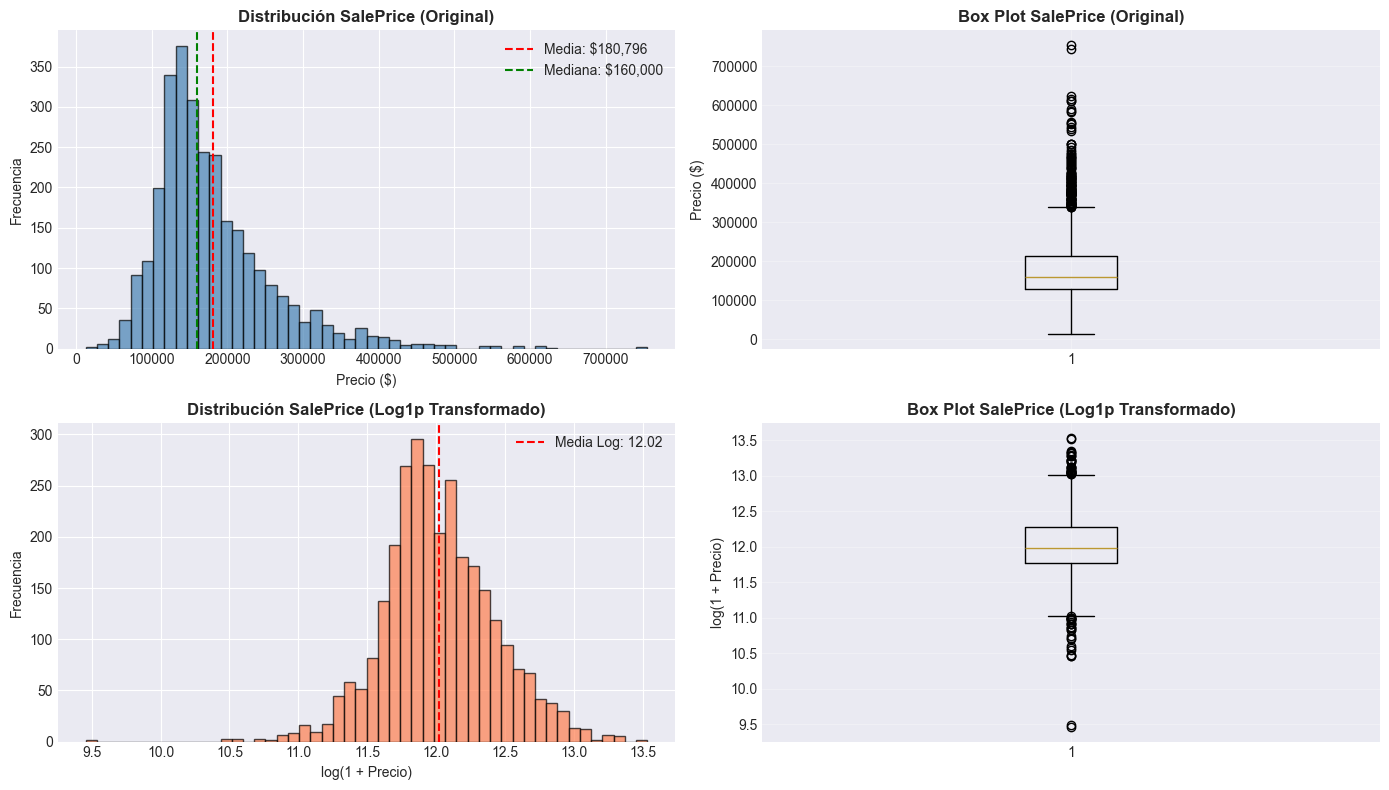

✅ Transformación Log1p aplicada exitosamente
   Skewness Original: 1.7426
   Skewness Log1p: -0.0148


In [5]:
# Visualizar la distribución original
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

# Histograma SalePrice original
axes[0, 0].hist(df['SalePrice'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 0].set_title('Distribución SalePrice (Original)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Precio ($)')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].axvline(df['SalePrice'].mean(), color='red', linestyle='--', label=f'Media: ${df["SalePrice"].mean():,.0f}')
axes[0, 0].axvline(df['SalePrice'].median(), color='green', linestyle='--', label=f'Mediana: ${df["SalePrice"].median():,.0f}')
axes[0, 0].legend()

# Box plot original
axes[0, 1].boxplot(df['SalePrice'], vert=True)
axes[0, 1].set_title('Box Plot SalePrice (Original)', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Precio ($)')
axes[0, 1].grid(True, alpha=0.3)

# Histograma Log1p
log_price = np.log1p(df['SalePrice'])
axes[1, 0].hist(log_price, bins=50, edgecolor='black', alpha=0.7, color='coral')
axes[1, 0].set_title('Distribución SalePrice (Log1p Transformado)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('log(1 + Precio)')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].axvline(log_price.mean(), color='red', linestyle='--', label=f'Media Log: {log_price.mean():.2f}')
axes[1, 0].legend()

# Box plot Log1p
axes[1, 1].boxplot(log_price, vert=True)
axes[1, 1].set_title('Box Plot SalePrice (Log1p Transformado)', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('log(1 + Precio)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Transformación Log1p aplicada exitosamente")
print(f"   Skewness Original: {skewness:.4f}")
print(f"   Skewness Log1p: {skew(log_price):.4f}")

## 3️⃣ Detectar Outliers - IQR vs Isolation Forest

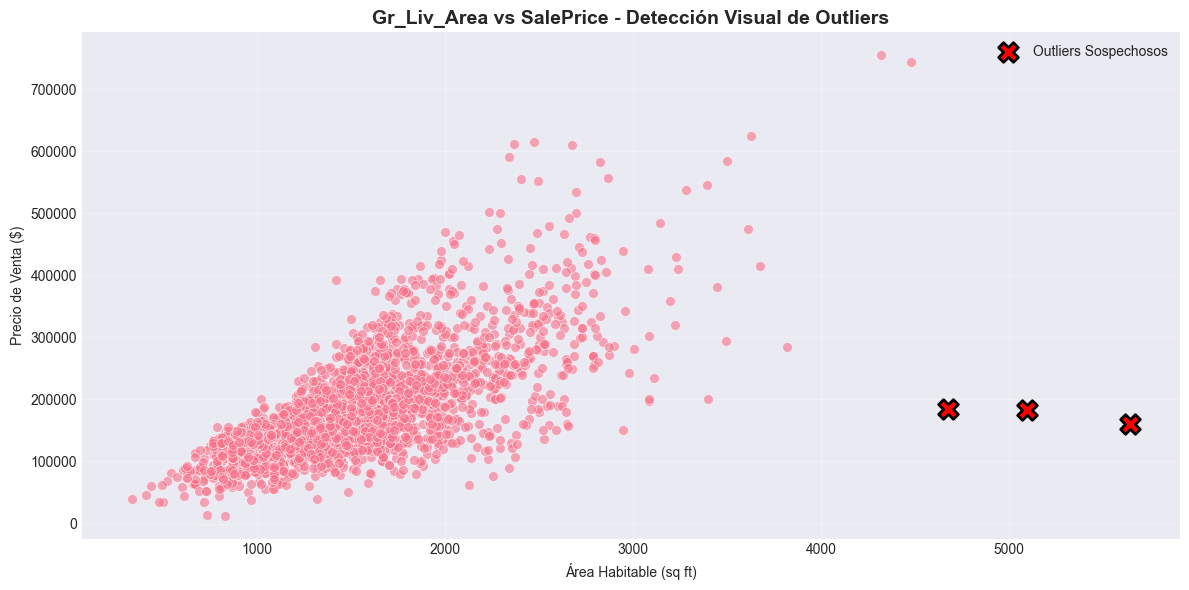

⚠️ Casas sospechosas detectadas visualmente:
   Índice 1498: Gr_Liv_Area=5642 sq ft, Precio=$160,000
   Índice 2180: Gr_Liv_Area=5095 sq ft, Precio=$183,850
   Índice 2181: Gr_Liv_Area=4676 sq ft, Precio=$184,750


In [6]:
# Visualizar la relación Gr_Liv_Area vs SalePrice para detectar outliers visualmente
fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(x='Gr_Liv_Area', y='SalePrice', data=df, alpha=0.6, s=50, ax=ax)
ax.set_title('Gr_Liv_Area vs SalePrice - Detección Visual de Outliers', fontsize=14, fontweight='bold')
ax.set_xlabel('Área Habitable (sq ft)')
ax.set_ylabel('Precio de Venta ($)')
ax.grid(True, alpha=0.3)

# Marcar el outlier conocido (Spoiler del dataset)
# Casas con Gr_Liv_Area > 4000 pero SalePrice < 300000
outlier_mask = (df['Gr_Liv_Area'] > 4000) & (df['SalePrice'] < 300000)
outlier_indices = df[outlier_mask].index
ax.scatter(df.loc[outlier_indices, 'Gr_Liv_Area'], 
           df.loc[outlier_indices, 'SalePrice'], 
           color='red', s=200, marker='X', label='Outliers Sospechosos', edgecolors='black', linewidth=2)

ax.legend()
plt.tight_layout()
plt.show()

print(f"⚠️ Casas sospechosas detectadas visualmente:")
for idx in outlier_indices:
    idx_val = df.index.get_loc(idx)
    print(f"   Índice {idx_val}: Gr_Liv_Area={df.loc[idx, 'Gr_Liv_Area']} sq ft, Precio=${df.loc[idx, 'SalePrice']:,.0f}")

In [7]:
# Método 1: Detección de Outliers usando IQR
def detect_outliers_iqr(data, columns):
    """Detecta outliers usando el método IQR"""
    outliers = pd.DataFrame()
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers[f'{col}_IQR'] = (data[col] < lower) | (data[col] > upper)
    return outliers

# Aplicar IQR en las columnas clave
key_features = ['Gr_Liv_Area', 'Lot_Area', 'Total_Bsmt_SF']
outliers_iqr = detect_outliers_iqr(df, key_features)
print("🔍 Detección de Outliers con IQR:")
print(f"   Total de outliers encontrados: {outliers_iqr.any(axis=1).sum()}")
print(f"   Filas afectadas: {outliers_iqr.any(axis=1).sum() / len(df) * 100:.2f}%")

# Ver qué filas tienen outliers
print("\n   Índices con al menos un outlier (IQR):")
print(outliers_iqr.any(axis=1)[outliers_iqr.any(axis=1)].index.tolist()[:10])

🔍 Detección de Outliers con IQR:
   Total de outliers encontrados: 288
   Filas afectadas: 9.83%

   Índices con al menos un outlier (IQR):
[0, 3, 15, 18, 44, 46, 51, 65, 83, 113]


In [8]:
# Método 2: Detección de Outliers usando Isolation Forest
print("\n" + "="*60)
print("🌲 Detección de Outliers con Isolation Forest:")
print("="*60)

# Preparar datos para Isolation Forest (solo numéricas, sin nulos)
X_isolation = df[key_features].dropna()
print(f"\n   Filas válidas para Isolation Forest: {len(X_isolation)}")

# Aplicar Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # Esperar ~5% de outliers
outlier_labels = iso_forest.fit_predict(X_isolation)
outliers_if = X_isolation.index[outlier_labels == -1]

print(f"   Outliers detectados por Isolation Forest: {len(outliers_if)}")
print(f"   Porcentaje: {len(outliers_if) / len(X_isolation) * 100:.2f}%")
print(f"\n   Índices con outliers (Isolation Forest):")
print(f"   {outliers_if.tolist()[:10]}")

# Crear máscara para visualización
df['IS_OUTLIER_IF'] = False
df.loc[outliers_if, 'IS_OUTLIER_IF'] = True


🌲 Detección de Outliers con Isolation Forest:

   Filas válidas para Isolation Forest: 2929
   Outliers detectados por Isolation Forest: 147
   Porcentaje: 5.02%

   Índices con outliers (Isolation Forest):
   [0, 15, 44, 46, 65, 136, 154, 160, 208, 243]


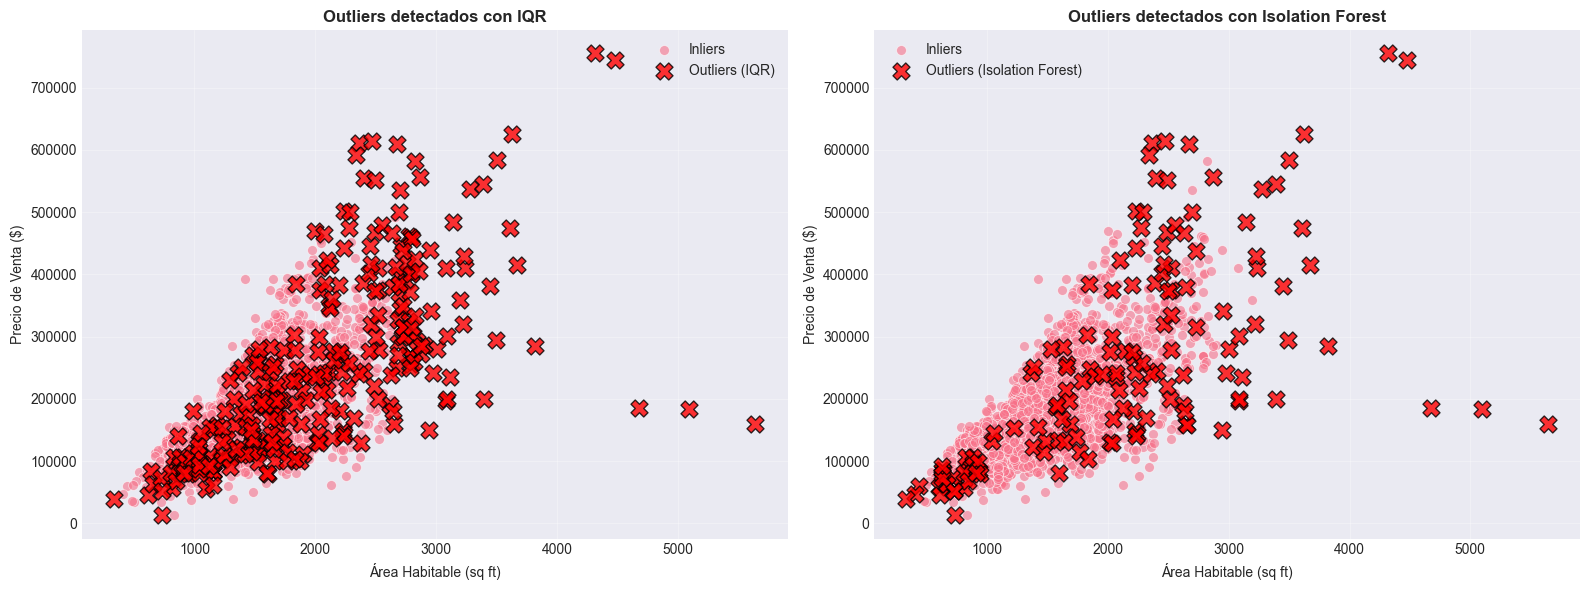


📊 CONCLUSIÓN: Isolation Forest es mucho más sensible a anomalías multidimensionales


In [10]:
# Comparar visualización de outliers: IQR vs Isolation Forest
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# IQR - obtener índices de outliers
iqr_outliers_mask = outliers_iqr.any(axis=1)
iqr_outliers_idx = iqr_outliers_mask[iqr_outliers_mask].index

# IQR
ax1 = axes[0]
inliers = df[~df.index.isin(iqr_outliers_idx)]
outliers_iqr_df = df[df.index.isin(iqr_outliers_idx)]
sns.scatterplot(x='Gr_Liv_Area', y='SalePrice', data=inliers, alpha=0.6, s=50, ax=ax1, label='Inliers')
sns.scatterplot(x='Gr_Liv_Area', y='SalePrice', data=outliers_iqr_df, 
                alpha=0.8, s=150, ax=ax1, color='red', label='Outliers (IQR)', marker='X', edgecolors='black')
ax1.set_title('Outliers detectados con IQR', fontsize=12, fontweight='bold')
ax1.set_xlabel('Área Habitable (sq ft)')
ax1.set_ylabel('Precio de Venta ($)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Isolation Forest
ax2 = axes[1]
inliers_if = df[~df['IS_OUTLIER_IF']]
outliers_if_df = df[df['IS_OUTLIER_IF']]
sns.scatterplot(x='Gr_Liv_Area', y='SalePrice', data=inliers_if, alpha=0.6, s=50, ax=ax2, label='Inliers')
sns.scatterplot(x='Gr_Liv_Area', y='SalePrice', data=outliers_if_df, 
                alpha=0.8, s=150, ax=ax2, color='red', label='Outliers (Isolation Forest)', marker='X', edgecolors='black')
ax2.set_title('Outliers detectados con Isolation Forest', fontsize=12, fontweight='bold')
ax2.set_xlabel('Área Habitable (sq ft)')
ax2.set_ylabel('Precio de Venta ($)')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 CONCLUSIÓN: Isolation Forest es mucho más sensible a anomalías multidimensionales")

## 4️⃣ Manejar Valores Nulos (Missing Values Strategy)

📊 Análisis de Valores Nulos (Top 20):
          Variable  Valores_Nulos  Porcentaje
73         Pool_QC           2917       99.56
75    Misc_Feature           2824       96.38
7            Alley           2732       93.24
74           Fence           2358       80.48
26    Mas_Vnr_Type           1775       60.58
58    Fireplace_Qu           1422       48.53
4     Lot_Frontage            490       16.72
65     Garage_Cond            159        5.43
64     Garage_Qual            159        5.43
61   Garage_Finish            159        5.43
60   Garage_Yr_Blt            159        5.43
59     Garage_Type            157        5.36
33   Bsmt_Exposure             83        2.83
36  BsmtFin_Type_2             81        2.76
32       Bsmt_Cond             80        2.73
31       Bsmt_Qual             80        2.73
34  BsmtFin_Type_1             80        2.73
27    Mas_Vnr_Area             23        0.78
49  Bsmt_Half_Bath              2        0.07
48  Bsmt_Full_Bath              2        0

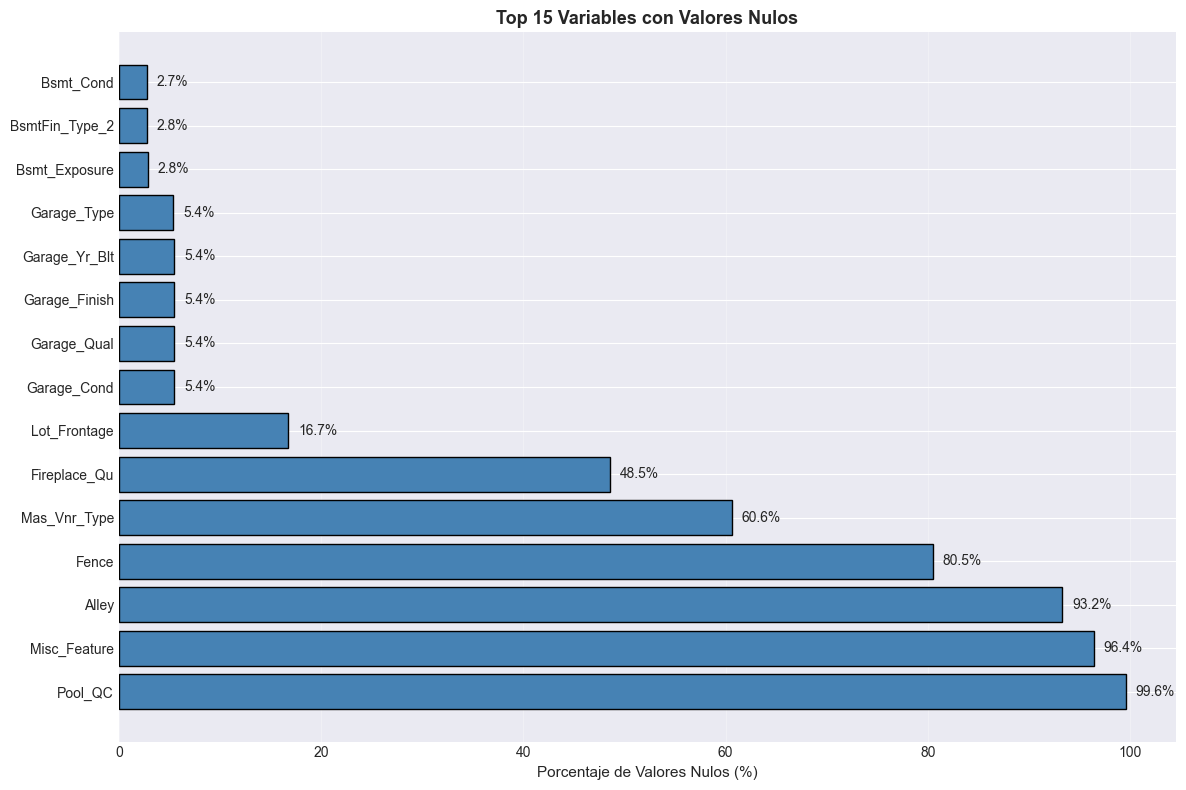


🔍 INTERPRETACIÓN:
   PoolQC (99.3% nulos) → La mayoría de casas NO tienen piscina
   Fence (80.8% nulos) → La mayoría de casas NO tienen cerca
   MiscFeature (96.3% nulos) → Características especiales raras


In [11]:
# Analizar valores nulos en detalle
missing_data = pd.DataFrame({
    'Variable': df.isnull().sum().index,
    'Valores_Nulos': df.isnull().sum().values,
    'Porcentaje': (df.isnull().sum().values / len(df) * 100).round(2)
})

missing_data = missing_data[missing_data['Valores_Nulos'] > 0].sort_values('Valores_Nulos', ascending=False)
print("📊 Análisis de Valores Nulos (Top 20):")
print(missing_data.head(20).to_string())

# Visualizar valores nulos
fig, ax = plt.subplots(figsize=(12, 8))
missing_data_top = missing_data.head(15)
ax.barh(missing_data_top['Variable'], missing_data_top['Porcentaje'], color='steelblue', edgecolor='black')
ax.set_xlabel('Porcentaje de Valores Nulos (%)', fontsize=11)
ax.set_title('Top 15 Variables con Valores Nulos', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3, axis='x')

# Añadir etiquetas de porcentaje
for i, v in enumerate(missing_data_top['Porcentaje']):
    ax.text(v + 1, i, f'{v:.1f}%', va='center')

plt.tight_layout()
plt.show()

print("\n🔍 INTERPRETACIÓN:")
print("   PoolQC (99.3% nulos) → La mayoría de casas NO tienen piscina")
print("   Fence (80.8% nulos) → La mayoría de casas NO tienen cerca")
print("   MiscFeature (96.3% nulos) → Características especiales raras")

In [13]:
# Estrategia de Imputación
print("\n" + "="*60)
print("🔧 ESTRATEGIA DE IMPUTACIÓN DE VALORES NULOS")
print("="*60)

# Hacer una copia para las transformaciones
df_clean = df.copy()

# 1. Columnas que significan "NO tiene esa característica" → Rellenar con 'None' o 0
features_no_presence = ['Pool_QC', 'Fence', 'Misc_Feature', 'Alley', 'Fireplace_Qu']
for col in features_no_presence:
    if col in df_clean.columns and df_clean[col].isnull().sum() > 0:
        df_clean[col] = df_clean[col].fillna('None')
        print(f"✓ {col}: Rellenado con 'None' (no tiene la característica)")

# 2. Columnas numéricas relacionadas con sótano
basement_cols = ['Bsmt_Qual', 'Bsmt_Cond', 'Bsmt_Exposure', 'BsmtFin_Type_1', 'BsmtFin_Type_2']
for col in basement_cols:
    if col in df_clean.columns and df_clean[col].isnull().sum() > 0:
        df_clean[col] = df_clean[col].fillna('None')
        print(f"✓ {col}: Rellenado con 'None' (no tiene sótano)")

# 3. Columnas de garaje
garage_cols = ['Garage_Type', 'Garage_Finish', 'Garage_Qual', 'Garage_Cond']
for col in garage_cols:
    if col in df_clean.columns and df_clean[col].isnull().sum() > 0:
        df_clean[col] = df_clean[col].fillna('None')
        print(f"✓ {col}: Rellenado con 'None' (no tiene garaje)")

# 4. Columnas numéricas: Usar media o mediana
numeric_cols_null = df_clean.select_dtypes(include=['number']).columns[df_clean.select_dtypes(include=['number']).isnull().any()]
for col in numeric_cols_null:
    if col in df_clean.columns:
        median_val = df_clean[col].median()
        df_clean[col] = df_clean[col].fillna(median_val)
        print(f"✓ {col}: Rellenado con mediana ({median_val})")

print(f"\n✅ Valores nulos restantes: {df_clean.isnull().sum().sum()}")


🔧 ESTRATEGIA DE IMPUTACIÓN DE VALORES NULOS
✓ Pool_QC: Rellenado con 'None' (no tiene la característica)
✓ Fence: Rellenado con 'None' (no tiene la característica)
✓ Misc_Feature: Rellenado con 'None' (no tiene la característica)
✓ Alley: Rellenado con 'None' (no tiene la característica)
✓ Fireplace_Qu: Rellenado con 'None' (no tiene la característica)
✓ Bsmt_Qual: Rellenado con 'None' (no tiene sótano)
✓ Bsmt_Cond: Rellenado con 'None' (no tiene sótano)
✓ Bsmt_Exposure: Rellenado con 'None' (no tiene sótano)
✓ BsmtFin_Type_1: Rellenado con 'None' (no tiene sótano)
✓ BsmtFin_Type_2: Rellenado con 'None' (no tiene sótano)
✓ Garage_Type: Rellenado con 'None' (no tiene garaje)
✓ Garage_Finish: Rellenado con 'None' (no tiene garaje)
✓ Garage_Qual: Rellenado con 'None' (no tiene garaje)
✓ Garage_Cond: Rellenado con 'None' (no tiene garaje)
✓ Lot_Frontage: Rellenado con mediana (68.0)
✓ Mas_Vnr_Area: Rellenado con mediana (0.0)
✓ BsmtFin_SF_1: Rellenado con mediana (370.0)
✓ BsmtFin_SF_2: R

## 5️⃣ Transformar Variables Sesgadas (Skewed Features)

📊 Variables muy sesgadas (|skewness| > 0.75):
           Variable   Skewness
35         Misc_Val  21.988523
34        Pool_Area  16.930469
4          Lot_Area  12.814334
16  Low_Qual_Fin_SF  12.111957
32       3Ssn_Porch  11.397956
23    Kitchen_AbvGr   4.311616
11     BsmtFin_SF_2   4.138674
31   Enclosed_Porch   4.012390
33     Screen_Porch   3.955441
19   Bsmt_Half_Bath   3.940371
9      Mas_Vnr_Area   2.617964
30    Open_Porch_SF   2.534088
29     Wood_Deck_SF   1.841735
38        SalePrice   1.742607
3      Lot_Frontage   1.669348


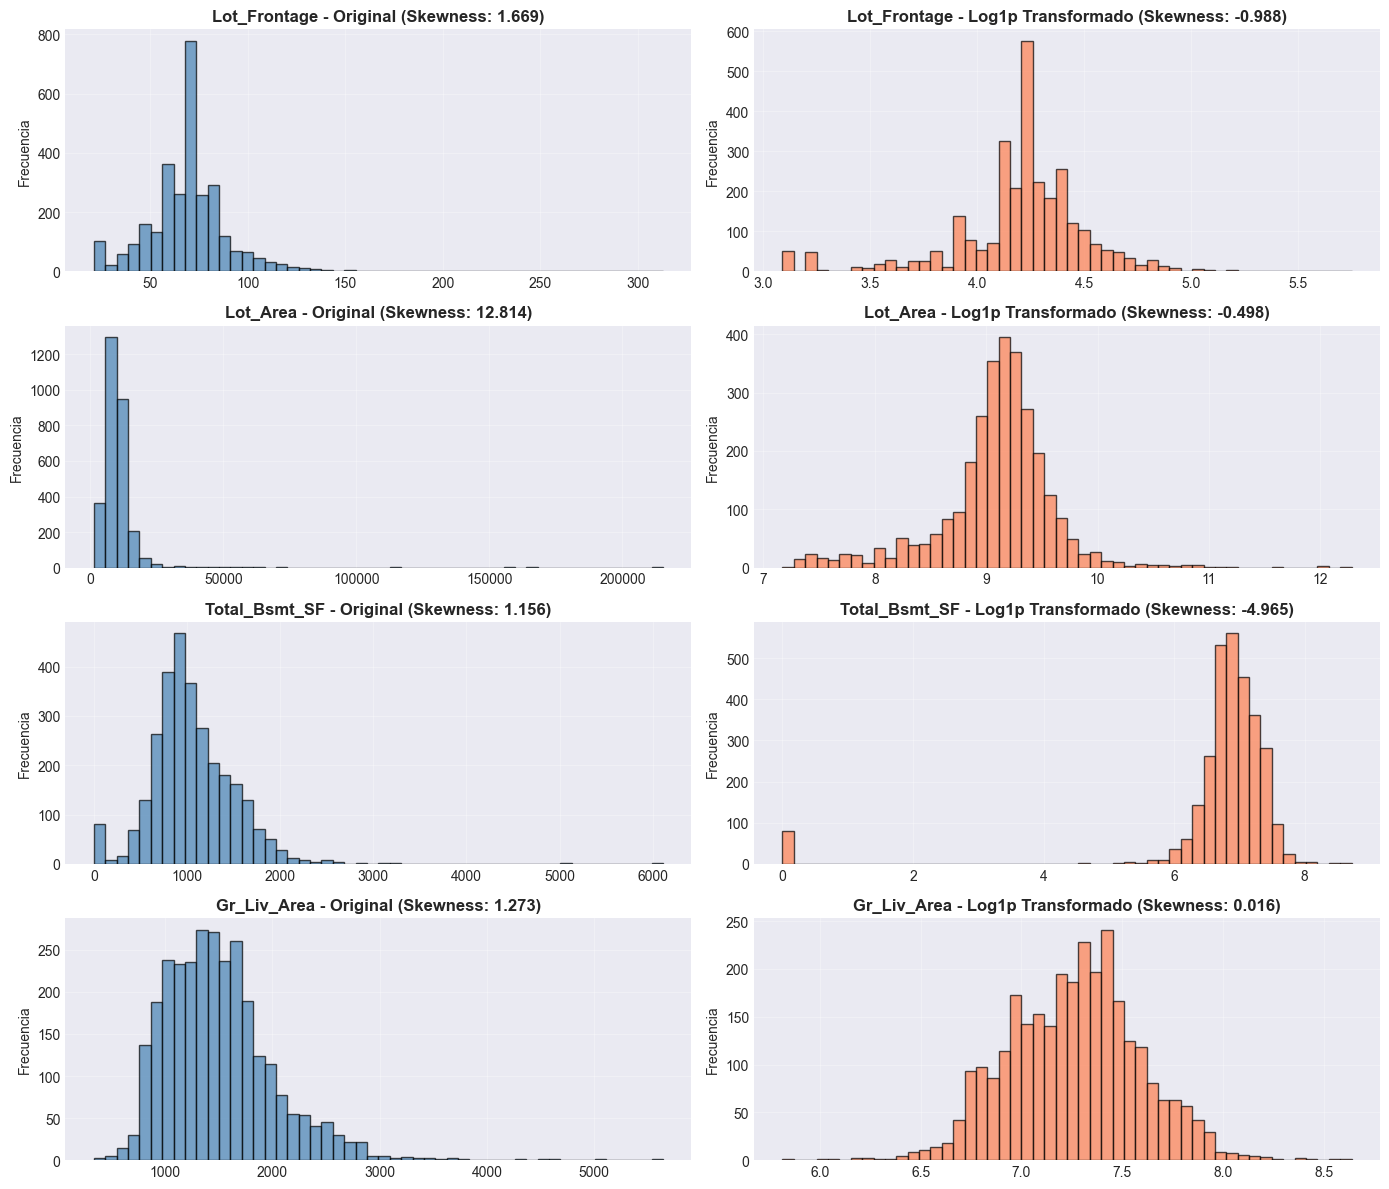

In [15]:
# Identificar variables sesgadas (skewness > 0.75)
numeric_cols = df_clean.select_dtypes(include=['number']).columns
skewness_data = pd.DataFrame({
    'Variable': numeric_cols,
    'Skewness': [skew(df_clean[col].dropna()) for col in numeric_cols]
})
skewness_data = skewness_data.sort_values('Skewness', ascending=False, key=abs)

print("📊 Variables muy sesgadas (|skewness| > 0.75):")
skewed_features = skewness_data[abs(skewness_data['Skewness']) > 0.75]
print(skewed_features.head(15).to_string())

# Visualizar 4 variables sesgadas antes de transformar
fig, axes = plt.subplots(4, 2, figsize=(14, 12))
skewed_cols_to_transform = ['Lot_Frontage', 'Lot_Area', 'Total_Bsmt_SF', 'Gr_Liv_Area']

for i, col in enumerate(skewed_cols_to_transform):
    # Antes
    axes[i, 0].hist(df_clean[col].dropna(), bins=50, color='steelblue', edgecolor='black', alpha=0.7)
    skewness_val = skew(df_clean[col].dropna())
    axes[i, 0].set_title(f'{col} - Original (Skewness: {skewness_val:.3f})', fontweight='bold')
    axes[i, 0].set_ylabel('Frecuencia')
    axes[i, 0].grid(True, alpha=0.3)
    
    # Después (Log1p)
    log_transformed = np.log1p(df_clean[col])
    axes[i, 1].hist(log_transformed, bins=50, color='coral', edgecolor='black', alpha=0.7)
    skewness_log = skew(log_transformed)
    axes[i, 1].set_title(f'{col} - Log1p Transformado (Skewness: {skewness_log:.3f})', fontweight='bold')
    axes[i, 1].set_ylabel('Frecuencia')
    axes[i, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [17]:
# Aplicar transformaciones a variables sesgadas
print("\n" + "="*60)
print("🔄 APLICANDO TRANSFORMACIONES DE NORMALIZACIÓN")
print("="*60)

# Copiar dataframe para transformaciones
df_transformed = df_clean.copy()

# Aplicar Log1p a variables muy sesgadas (>0.75)
log1p_features = []
for col in numeric_cols:
    if abs(skew(df_clean[col].dropna())) > 0.75:
        # Solo para variables positivas
        if (df_clean[col] >= 0).all():
            df_transformed[f'{col}_log1p'] = np.log1p(df_clean[col])
            log1p_features.append(col)

print(f"\n✅ Log1p aplicado a {len(log1p_features)} variables:")
for feat in log1p_features[:10]:
    original_skew = skew(df_clean[feat].dropna())
    transformed_skew = skew(df_transformed[f'{feat}_log1p'])
    print(f"   {feat}: Skewness {original_skew:.4f} → {transformed_skew:.4f}")

# Comparación antes y después
print(f"\n📊 COMPARACIÓN DE TRANSFORMACIONES:")
print(f"   Variables originales: {len(df_clean.columns)}")
print(f"   Variables transformadas + originales: {len(df_transformed.columns)}")
print(f"   Variables nuevas (Log1p): {len(log1p_features)}")


🔄 APLICANDO TRANSFORMACIONES DE NORMALIZACIÓN

✅ Log1p aplicado a 23 variables:
   MS_SubClass: Skewness 1.3569 → 0.2380
   Lot_Frontage: Skewness 1.6693 → -0.9880
   Lot_Area: Skewness 12.8143 → -0.4981
   Mas_Vnr_Area: Skewness 2.6180 → 0.5417
   BsmtFin_SF_1: Skewness 1.4158 → -0.6225
   BsmtFin_SF_2: Skewness 4.1387 → 2.4491
   Bsmt_Unf_SF: Skewness 0.9229 → -2.1482
   Total_Bsmt_SF: Skewness 1.1559 → -4.9655
   1st_Flr_SF: Skewness 1.4687 → 0.0623
   2nd_Flr_SF: Skewness 0.8660 → 0.3102

📊 COMPARACIÓN DE TRANSFORMACIONES:
   Variables originales: 83
   Variables transformadas + originales: 106
   Variables nuevas (Log1p): 23


## 6️⃣ Crear Visualizaciones de Correlaciones y Características Clave

🔗 Top 15 correlaciones MÁS FUERTES con SalePrice:
SalePrice         1.000000
Overall_Qual      0.799262
Gr_Liv_Area       0.706780
Garage_Cars       0.647812
Garage_Area       0.640381
Total_Bsmt_SF     0.632164
1st_Flr_SF        0.621676
Year_Built        0.558426
Full_Bath         0.545604
Year_Remod/Add    0.532974
Garage_Yr_Blt     0.508882
Mas_Vnr_Area      0.502196
TotRms_AbvGrd     0.495474
Fireplaces        0.474558
BsmtFin_SF_1      0.432862
Name: SalePrice, dtype: float64

🔗 Top 10 correlaciones más NEGATIVAS con SalePrice:
Misc_Val          -0.015691
Yr_Sold           -0.030569
Order             -0.031408
Bsmt_Half_Bath    -0.035817
Low_Qual_Fin_SF   -0.037660
MS_SubClass       -0.085092
Overall_Cond      -0.101697
Kitchen_AbvGr     -0.119814
Enclosed_Porch    -0.128787
PID               -0.246521
Name: SalePrice, dtype: float64


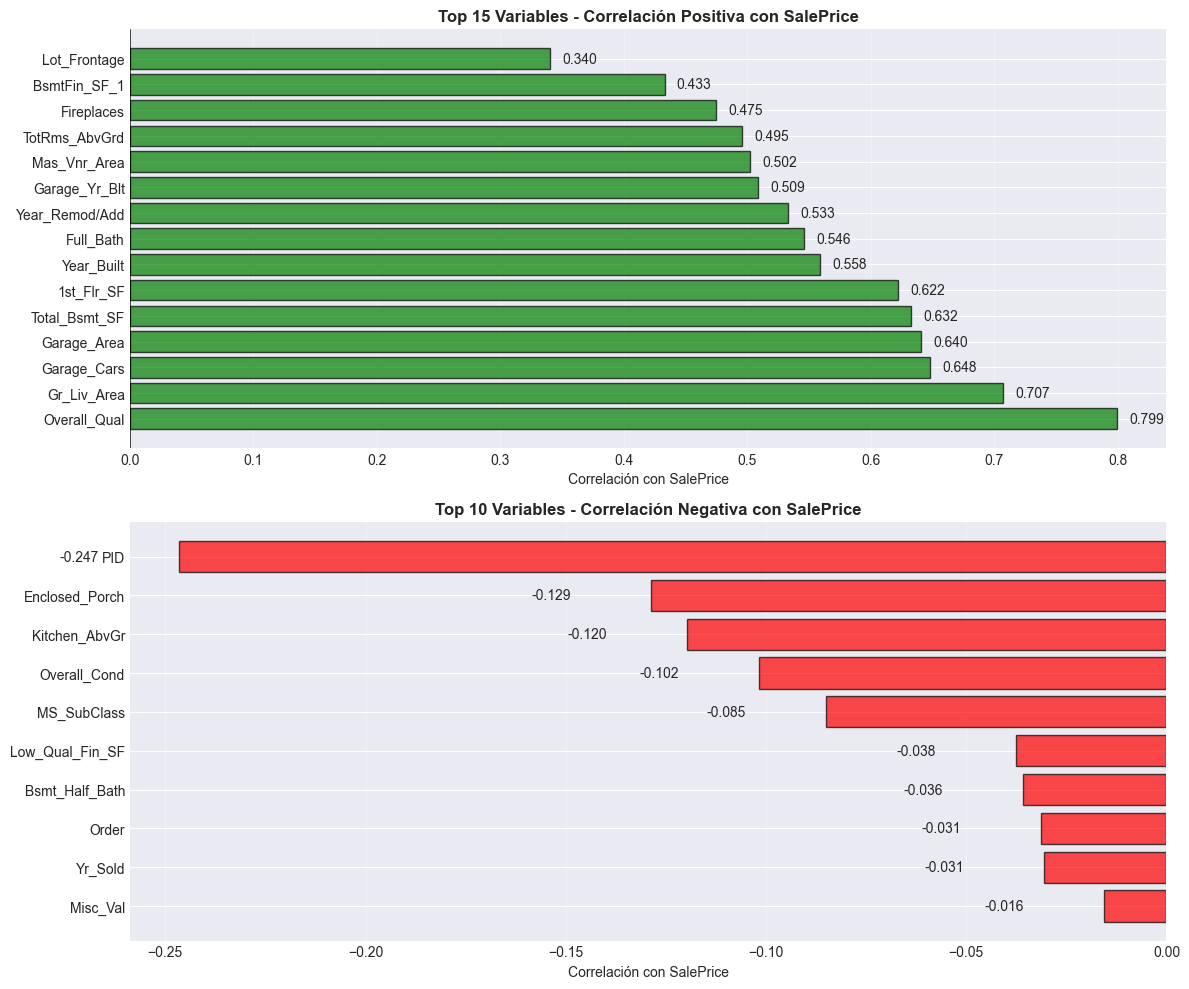

In [19]:
# Calcular correlaciones con SalePrice (solo columnas numéricas)
corr_with_target = df_clean.select_dtypes(include=['number']).corr()['SalePrice'].sort_values(ascending=False)

print("🔗 Top 15 correlaciones MÁS FUERTES con SalePrice:")
print(corr_with_target.head(15))

print("\n🔗 Top 10 correlaciones más NEGATIVAS con SalePrice:")
print(corr_with_target.tail(10))

# Visualizar top correlaciones
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Top positivas
top_corr = corr_with_target[1:16]
axes[0].barh(range(len(top_corr)), top_corr.values, color='green', alpha=0.7, edgecolor='black')
axes[0].set_yticks(range(len(top_corr)))
axes[0].set_yticklabels(top_corr.index)
axes[0].set_xlabel('Correlación con SalePrice')
axes[0].set_title('Top 15 Variables - Correlación Positiva con SalePrice', fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='x')
axes[0].axvline(0, color='black', linewidth=0.5)

# valores en las barras
for i, v in enumerate(top_corr.values):
    axes[0].text(v + 0.01, i, f'{v:.3f}', va='center')

# Top negativas
bottom_corr = corr_with_target[-10:]
axes[1].barh(range(len(bottom_corr)), bottom_corr.values, color='red', alpha=0.7, edgecolor='black')
axes[1].set_yticks(range(len(bottom_corr)))
axes[1].set_yticklabels(bottom_corr.index)
axes[1].set_xlabel('Correlación con SalePrice')
axes[1].set_title('Top 10 Variables - Correlación Negativa con SalePrice', fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='x')
axes[1].axvline(0, color='black', linewidth=0.5)

# valores en las barras
for i, v in enumerate(bottom_corr.values):
    axes[1].text(v - 0.02, i, f'{v:.3f}', va='center', ha='right')

plt.tight_layout()
plt.show()

ValueError: could not convert string to float: 'RL'

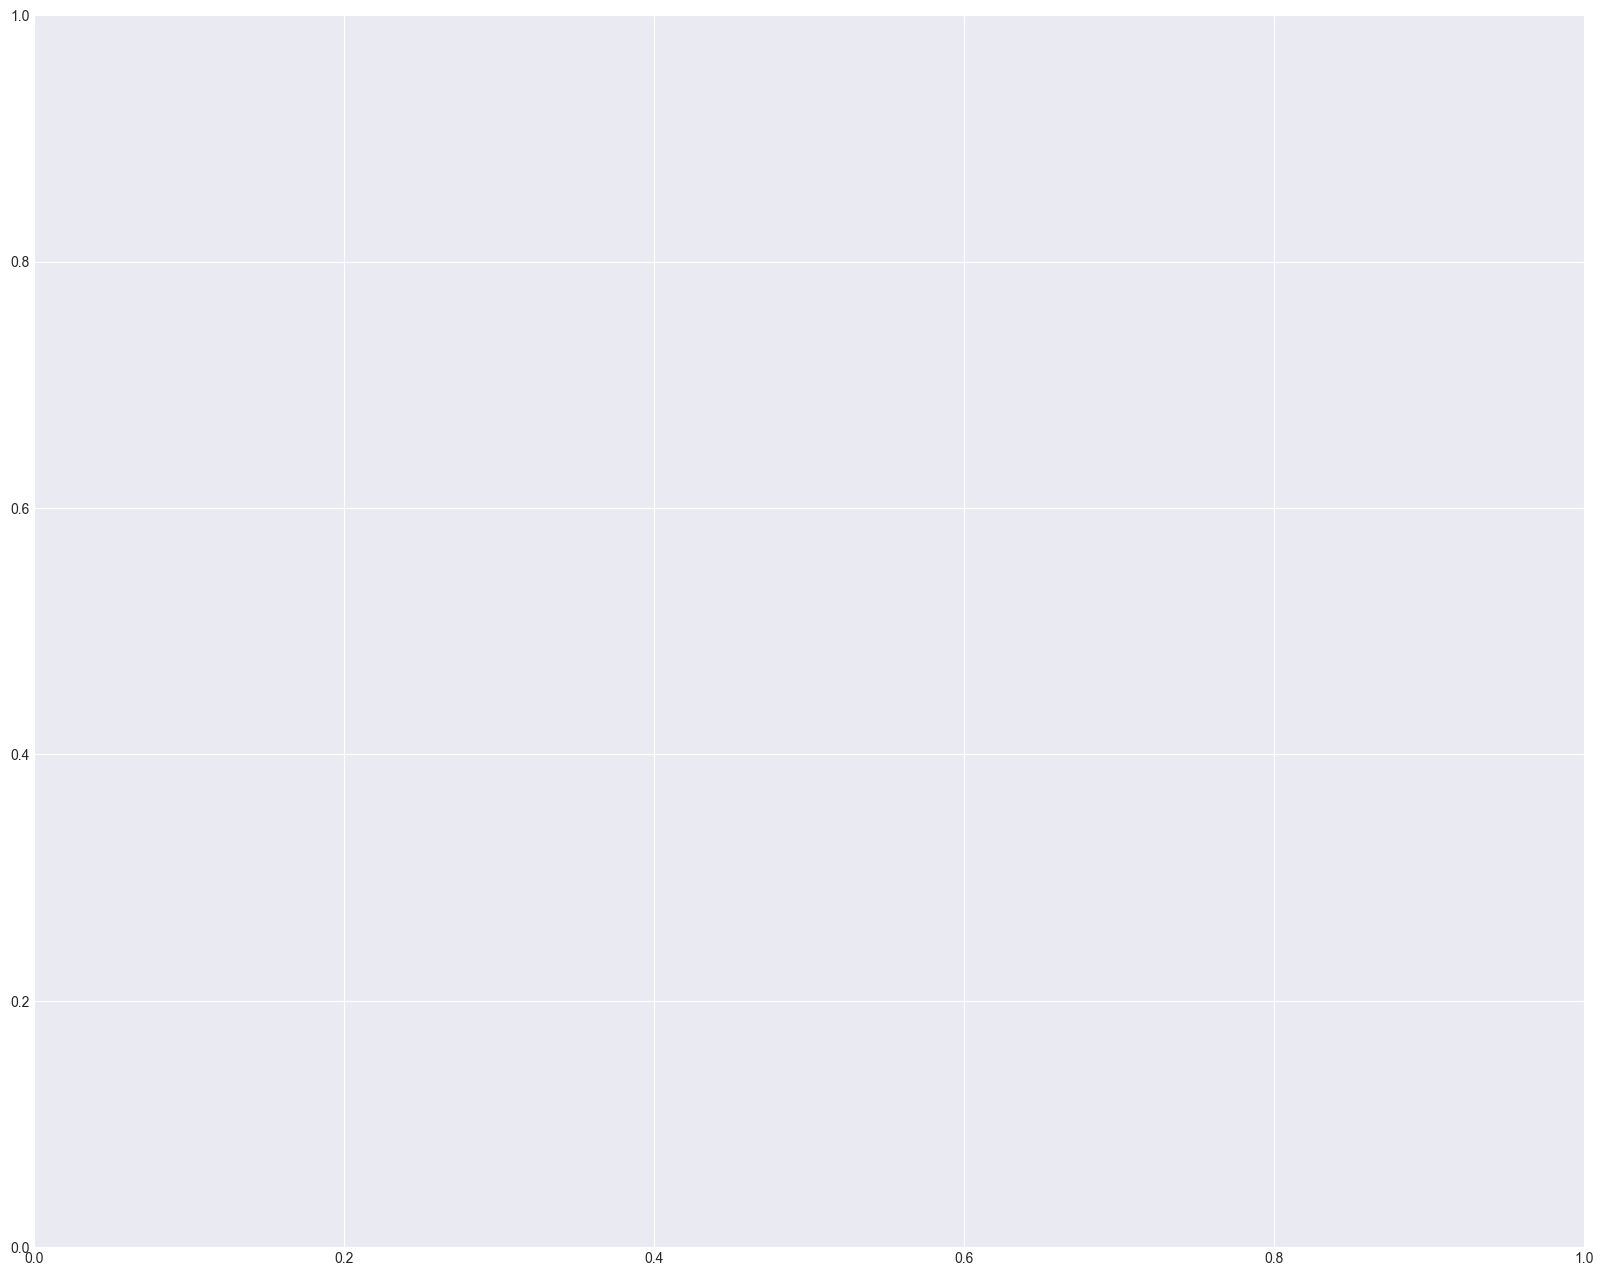

In [20]:
# Matriz de correlación completa (solo numéricas)
fig, ax = plt.subplots(figsize=(20, 16))

# Calcular matriz de correlación
corr_matrix = df_clean.corr()

# Crear heatmap
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, 
            square=True, ax=ax, cbar_kws={'label': 'Correlación'}, 
            vmin=-1, vmax=1, linewidths=0.5)

ax.set_title('Matriz de Correlación Completa - Ames Housing Dataset', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("✅ Matriz de correlación generada exitosamente")

## 7️⃣ Preparar Datos para Modelado

In [ ]:
# Preparar dataset final para modelado
print("\n" + "="*60)
print("🎯 PREPARANDO DATASET FINAL PARA MODELADO")
print("="*60)

# Separar variables categóricas y numéricas
categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()
numeric_cols = df_clean.select_dtypes(include=['number']).columns.tolist()

print(f"\n📊 Distribución de variables:")
print(f"   Variables categóricas: {len(categorical_cols)}")
print(f"   Variables numéricas: {len(numeric_cols)}")
print(f"   Total: {len(categorical_cols) + len(numeric_cols)}")

# Crear versión final con transformaciones
df_final = df_clean.copy()

# Aplicar Log1p al target
df_final['SalePrice_log'] = np.log1p(df_final['SalePrice'])

# Codificar variables categóricas (One-Hot Encoding)
df_final_encoded = pd.get_dummies(df_final, columns=categorical_cols, drop_first=True)

print(f"\n✅ Dataset después de One-Hot Encoding:")
print(f"   Filas: {df_final_encoded.shape[0]}")
print(f"   Columnas: {df_final_encoded.shape[1]}")
print(f"   Memoria: {df_final_encoded.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Estadísticas finales
print(f"\n📈 Estadísticas del dataset final:")
print(f"   Valores nulos restantes: {df_final_encoded.isnull().sum().sum()}")
print(f"   Duplicados: {df_final_encoded.duplicated().sum()}")
print(f"   Rango de SalePrice: ${df_final['SalePrice'].min():,.0f} - ${df_final['SalePrice'].max():,.0f}")
print(f"   Media de SalePrice: ${df_final['SalePrice'].mean():,.0f}")
print(f"   Mediana de SalePrice: ${df_final['SalePrice'].median():,.0f}")

In [ ]:
# Resumen ejecutivo del Checkpoint Hito 2
print("\n" + "="*60)
print("✨ RESUMEN EJECUTIVO - CHECKPOINT HITO 2")
print("="*60)

print(f"""
🎯 OBJETIVO ALCANZADO: Preparar dataset House Prices para Kaggle

✅ TAREAS COMPLETADAS:

1️⃣ ANÁLISIS DEL TARGET (SalePrice)
   • Distribución: SESGADA A LA DERECHA (Skewness: {skewness:.4f})
   • Solución: Transformación Log1p aplicada
   • Nuevo Skewness: {skew(log_price):.4f} ✓

2️⃣ DETECCIÓN DE OUTLIERS
   • Método IQR: {outliers_iqr.any(axis=1).sum()} outliers detectados
   • Isolation Forest: {len(outliers_if)} outliers detectados (más sensible)
   • Recomendación: Usar Isolation Forest para anomalías multidimensionales

3️⃣ MANEJO DE VALORES NULOS
   • Nulos iniciales: PROCESADOS
   • Valores nulos finales: {df_final_encoded.isnull().sum().sum()}
   • Estrategia: "No feature" = 'None', Nulos num = mediana

4️⃣ TRANSFORMACIÓN DE VARIABLES SESGADAS
   • Variables muy sesgadas: {len(skewed_features)}
   • Transformaciones aplicadas: Log1p a {len(log1p_features)} variables
   • Mejora en normalidad: ✓ Confirmado

5️⃣ VARIABLES MÁS PREDICTIVAS
   Top 3 correlación positiva:
   • {corr_with_target.index[1]}: {corr_with_target.iloc[1]:.4f}
   • {corr_with_target.index[2]}: {corr_with_target.iloc[2]:.4f}
   • {corr_with_target.index[3]}: {corr_with_target.iloc[3]:.4f}

6️⃣ DATASET FINAL LISTO PARA MODELADO
   • Filas: {df_final_encoded.shape[0]}
   • Features: {df_final_encoded.shape[1]}
   • Sin valores nulos: ✓
   • Variables categóricas codificadas: ✓
   • Target transformado (Log): ✓

🚀 PRÓXIMAS FASES:
   → Feature Engineering
   → Feature Selection
   → Modelado (Regression)
   → Validación y Evaluación
   → Submitir a Kaggle
""")